# Imaging Lab 2: Single Pixel Scanning

### EECS 16A: Designing Information Devices and Systems I, Summer 2020


## Table of Contents

* [Instructions](#instructions)
* [Lab Policies](#policies)
* [Images, Vectors, and Matrices](#images)
    * [Working with Images](#task2a)
    * [Scanning Mask Matrix](#task2b)
* [Imaging Real Pictures](#task3)
    * [Hardware Setup](#setup)
* [FAQ](#faq)

<a id='instructions'></a>
## Instructions
* Complete this lab by filling in all of the required sections, marked with `"YOUR CODE HERE"` or `"YOUR COMMENTS HERE"`.


* When you finish, submit a checkoff request to get checked off for this lab. Be ready to answer a few questions to show your understanding of each section.


* Labs will be graded based on completion for teams of 2 (or 3) students.

<a id='policies'></a>
## Lab Policies
* **YOU MUST ATTEND THE LAB SECTION YOU ARE ENROLLED IN. If you anticipate missing a section, please notify your GSI in advance.**
* **You are required to return all parts checked out at the beginning of the lab section unless told otherwise.**
* **You are free to stay for the full allotted time and hack around with the lab equipment, but please keep the GSI's time in mind and do not work on unrelated assignments.**
* **Food and drinks (except water) are not allowed in the lab.**
* **Clean up, turn off all equipment, and log off of computers before leaving.**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
%matplotlib inline
%run scripts/helper.py

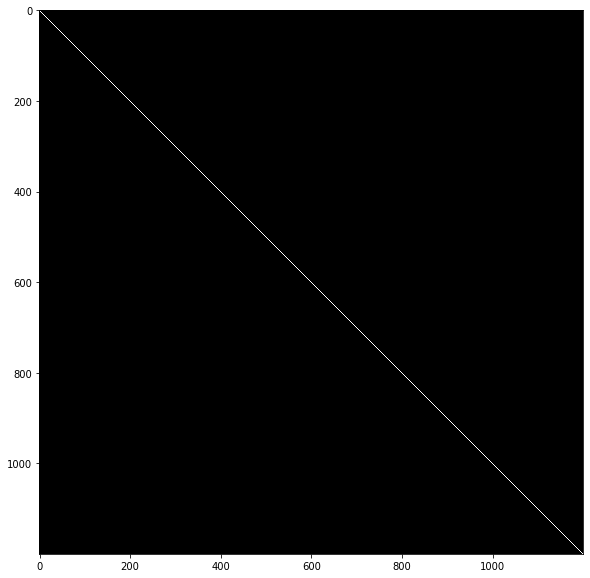

In [2]:
H = np.eye(1200)
plt.figure(figsize = (10, 10))
plt.imshow(H, cmap = 'gray', interpolation="nearest")

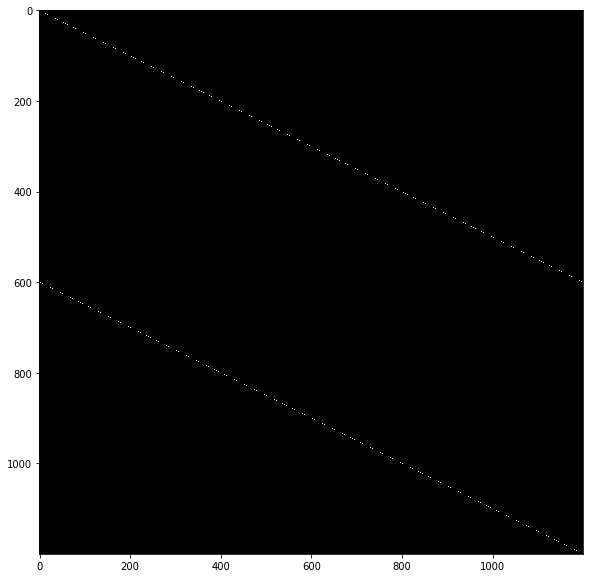

In [3]:
H_Alt = np.concatenate((H[::2], H[1::2]), axis = 0)
plt.figure(figsize = (10, 10))
plt.imshow(H_Alt, cmap = 'gray', interpolation="nearest")

In [4]:
test_masks_img2(H, H_Alt)

H and H_Alt are the correct dimension and are both invertible. Proceed to the next step


**<span style="color:red">Run the cell below to save `H` and `H_Alt`!</span>**

In [5]:
np.save('H.npy', H)
np.save('H_Alt.npy', H_Alt)

**<span style="color:red">You will then run the `capture_image.py` script below that projects mask patterns onto your image based on the $H$ matrix that you designate. This script controls the scanning process.</span>** 

In the code block below, the `--mask` tag points to the file (including the npy extension) associated with the mask matrix you want to use. The `--out` tag tells the script where you want to save the column vector sensor data. (The "out" file name doesn't include the npy extension, as it's automatically appended. Additionally, info about the capture settings, like projector brightness, is also appended to the file name. We'll take care of this for you.)

When running **`capture_image.py`**, a new icon shaped like a white web will appear in the taskbar. The window depicting our masks will appear on the projector's screen. *You can confirm this by looking into the box. (Don't forget to close the box when you're done checking!)*

Before scanning, you will be prompted to specify the **COM port used by the Launchpad and the display associated with the projector.** 

**Select the COM port associated with UART1 (previously accessed in the Energia Serial Monitor and found using the Device Manager) and the 1280x720 projector screen.** Note that you want to specify the index of your choice i.e. for `2) 1280 x 720`, specify 2. **<span style="color:red">Make sure that you selected the correct COM port!</span>**

`capture_image.py` iterates over the rows of the $H$ matrix you made. These rows are translated, one-by-one, into real masks projected onto the screen. Light sensor readings are taken for each mask. At the start of the scan, you'll see a series of `Loc: # Data: #` printed to the output below. `Loc` corresponds to the index $k$ of the current sensor reading (and likewise current row of H). `Data` corresponds to the actual digitized value obtained from the light sensor. This "debug" information is printed consecutively for the first few/last few sensor outputs. Otherwise, this info is printed when `k % 100 = 0` (every 100 scans). 

Don't worry about messages like `Time delta between captures in s: #`. This is printed a lot because the lab computers are slow. Make sure you followed the hardware setup near the beginning - restart your MSP by unplugging and replugging it in after programming it.

The whole scanning process should take roughly 3 minutes. 

Running the code block below will start your scan - **don't** click on the window popup.

In [ ]:
# Import necessary libraries (so you don't have to start from the top)
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
%matplotlib inline

%run capture_image.py 

## To People Testing on JupyterHUB:
This script `run capture_image.py` will ask for a COM port to use, and an MSP that has `AnalogReadSerial` loaded onto it. The `.ino` file for it can be found in this same folder. Make sure the MSP is chosen in the COM port selection, or else you will see "Data Lost!" 10 times upon serial timeout.